In [ ]:
'''
Bienvenue sur ce notebook.
J'ai codé un SMA Covid.
Les résultats de la simulation arrivent dans le fichier log.txt

Les paramètres utilisés sont dans le fichier config.txt





'''

In [24]:
import pandas as pd
from statistics import mean,variance

dfHosp = pd.read_csv('current-covid-patients-hospital.csv')
dfRea = pd.read_csv('current-covid-patients-icu.csv')
#print(dfHosp.to_string())
#print(dfRea.to_string())

dfMerge = dfHosp.merge(dfRea)
#print(dfMerge)
"""
dfMerge

print(dfMerge["NbHosp"])
print(dfMerge["NbRea"])
"""
listNbHosp = dfMerge["NbHosp"].tolist()
listNbRea = dfMerge["NbRea"].tolist()

listRatioReaHosp = [ nbRea/nbHosp for nbHosp,nbRea in zip(listNbHosp,listNbRea) ]
print(len(listRatioReaHosp))
string = "double ratioHospRea[633] =  {"

for i in listRatioReaHosp:
    string = string + str(i) + ","
    
string += "};"

print(string)

print(mean(listRatioReaHosp)) ##0.1474089554531037

633
double ratioHospRea[633] =  {0.0,0.25,0.4,0.3333333333333333,0.3333333333333333,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.16666666666666666,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.09090909090909091,0.125,0.08333333333333333,0.10465116279069768,0.07758620689655173,0.2710352849941838,0.25942126514131897,0.24601031180947705,0.24818216609261384,0.24627118644067797,0.24072476272648835,0.2398247434567047,0.24628554560661223,0.2431245858184228,0.24144390806254054,0.2393478122412585,0.24095563139931742,0.23779193205944799,0.24138260288360547,0.2424135497529993,0.24202420242024203,0.2412842983429643,0.2401289282836422,0.24008141984787343,0.23859881031064112,0.2349758192701816,0.23447490877439658,0.23228646126352714,0.22664009409304756,0.221004243281471,0.21669501588626078,0.21203221222169588,0.2093765648472709,0.2053779838784974,0.20020238434051166,0.19693956114461697,0.19065709410514795,0.18787481566442732,0.1851341599422686,0.1

In [2]:
!g++ -O2 -c Position.cpp Human.cpp RandMT.cpp World.cpp SimulationParams.cpp main.cpp

In [3]:
!g++ -O2 Human.o main.o Position.o RandMT.o World.o SimulationParams.o -o exe

In [4]:
## A CHANGER EN FONCTION DE LA CONFIG QUE VOUS VOULEZ TESTER

In [ ]:
!./replicationParisFullNoVaccin.sh

Courbe des nouveaux cas sur la réplication num : 0
Courbe des nouvelles hospitalisation sur la réplication num : 0
Courbe des nouvelles réanimation sur la réplication num : 0
Courbe des nouveaux morts sur la réplication num : 0
Courbe de Reffectif sur la réplication num : 0
Le taux de mort de cas connu est de : 0.9715670901813004%
Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.11084258535787618%
Le taux de mortalité pour les 25 - 35 ans est de : 0.08496497554896815%
Le taux de mortalité pour les 35 - 45 ans est de : 0.15244430585871185%
Le taux de mortalité pour les 45 - 55 ans est de : 0.5063870103564312%
Le taux de mortalité pour les 55 - 65 ans est de : 1.504590275416525%
Le taux de mortalité pour les 65 - 75 ans est de : 3.1696588699477073%
Le taux de mortalité pour les 75 + ans est de : 3.2477866188501627%
############
################
 replication = 0
Courbe des nouveaux cas sur la réplication num : 1
Courbe des nouvell

/tmp/ipykernel_108718/3173971200.py:96: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(replication*5)


Courbe des nouveaux cas sur la réplication num : 4
Courbe des nouvelles hospitalisation sur la réplication num : 4
Courbe des nouvelles réanimation sur la réplication num : 4
Courbe des nouveaux morts sur la réplication num : 4
Courbe de Reffectif sur la réplication num : 4
Le taux de mort de cas connu est de : 0.9257723564977459%
Le taux de mortalité pour les 0 - 15 ans est de : 0.0%
Le taux de mortalité pour les 15 - 25 ans est de : 0.051163980557687394%
Le taux de mortalité pour les 25 - 35 ans est de : 0.058075273047453115%
Le taux de mortalité pour les 35 - 45 ans est de : 0.15770383220312253%
Le taux de mortalité pour les 45 - 55 ans est de : 0.47682467649912036%
Le taux de mortalité pour les 55 - 65 ans est de : 1.4185855263157896%
Le taux de mortalité pour les 65 - 75 ans est de : 3.1250593305614096%
Le taux de mortalité pour les 75 + ans est de : 3.0892422991992503%
############
################
 replication = 4
Courbe des nouveaux cas sur la réplication num : 5
Courbe des nou

/home/local.isima.fr/beantune/mambaforge/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/local.isima.fr/beantune/mambaforge/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


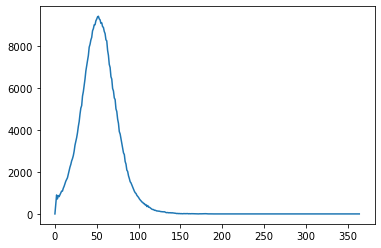

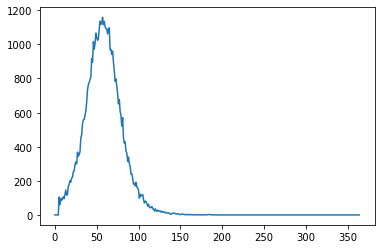

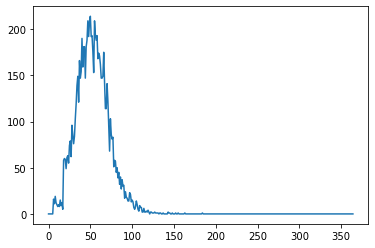

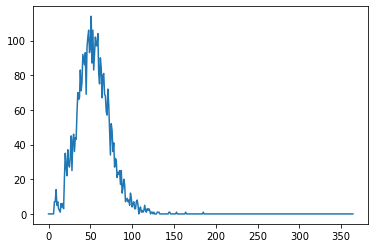

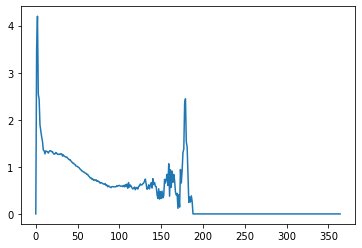

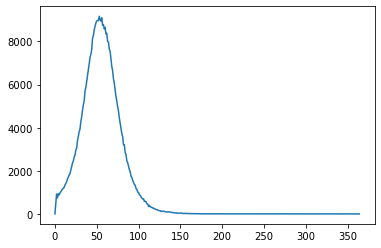

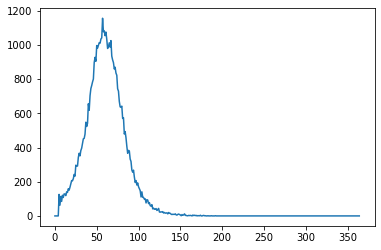

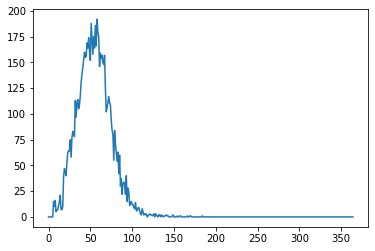

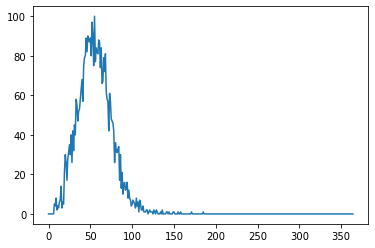

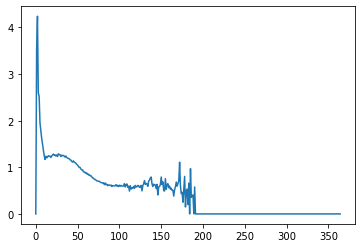

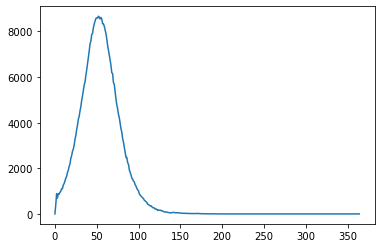

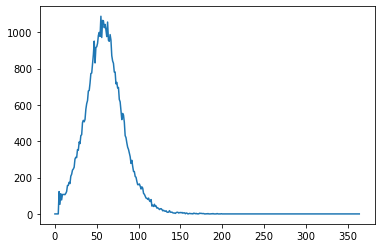

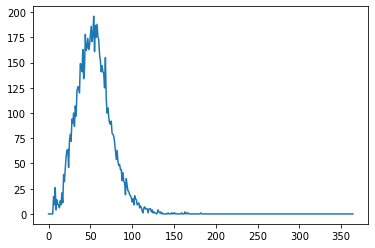

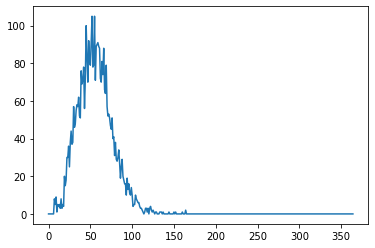

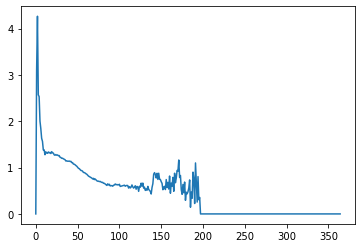

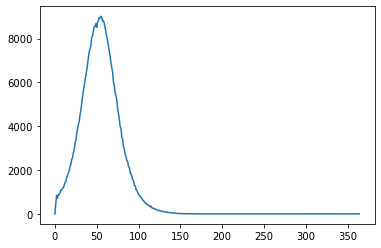

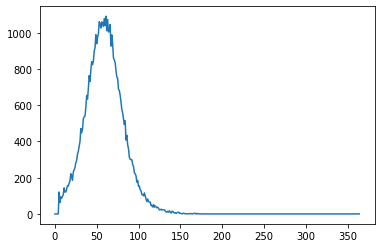

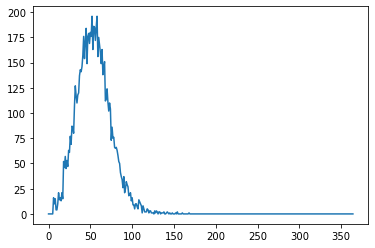

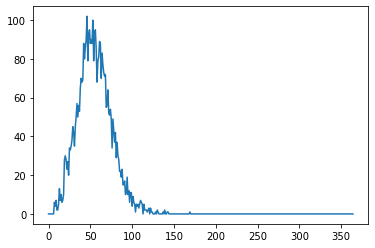

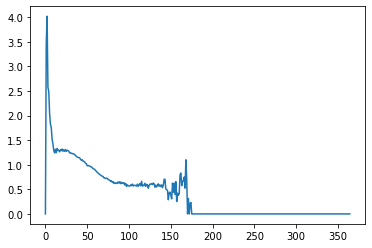

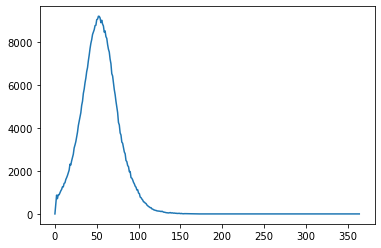

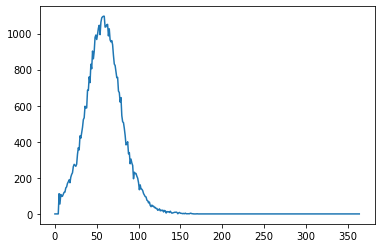

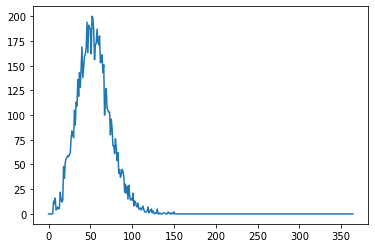

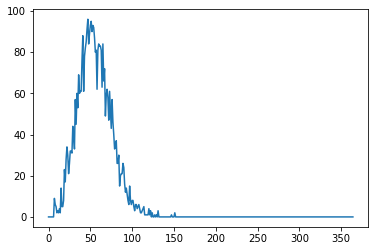

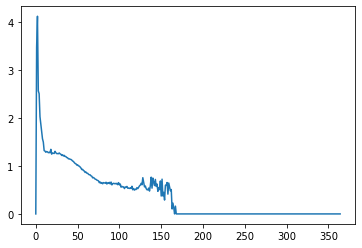

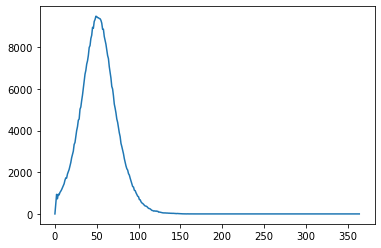

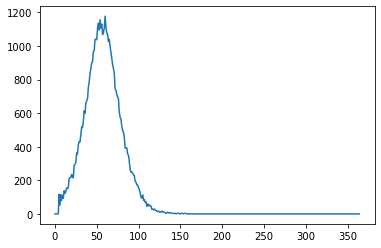

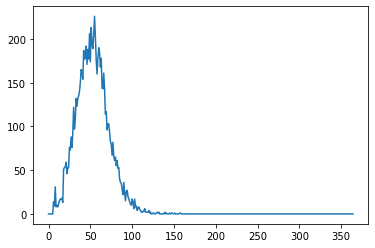

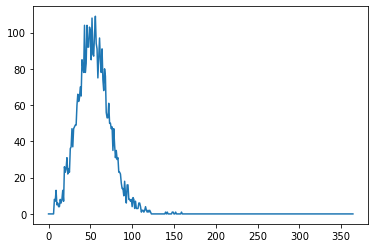

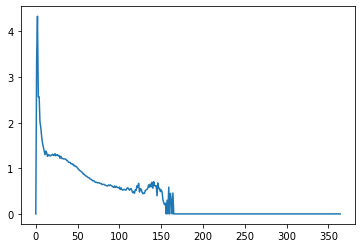

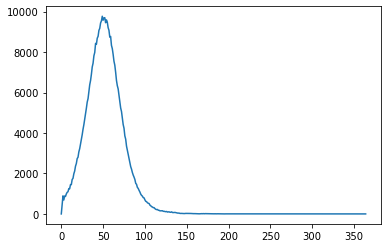

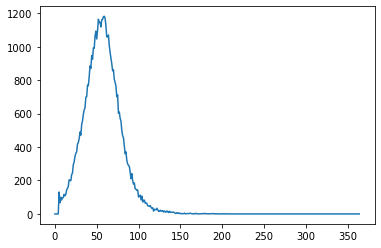

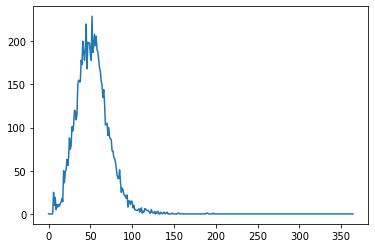

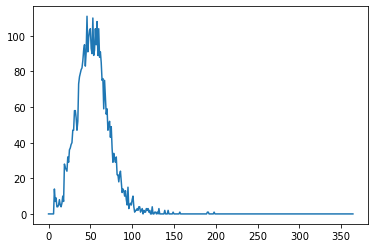

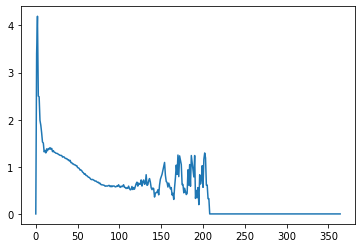

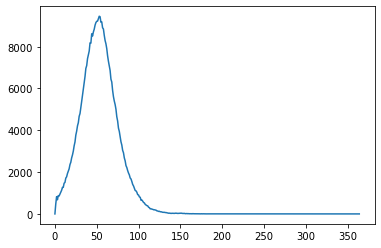

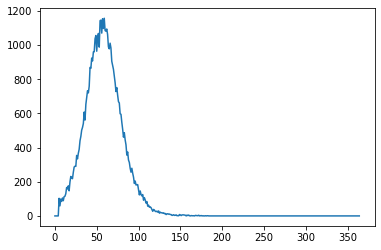

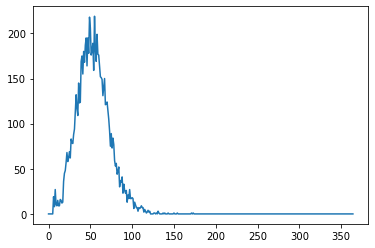

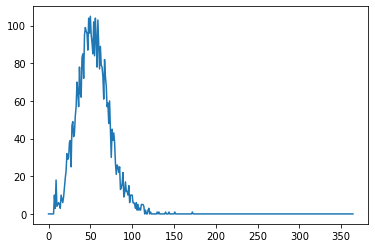

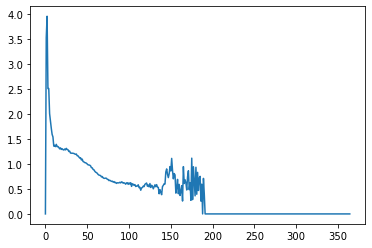

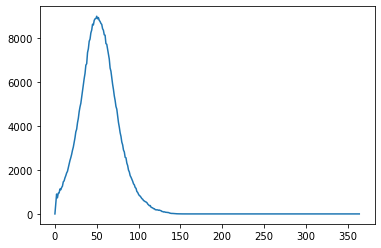

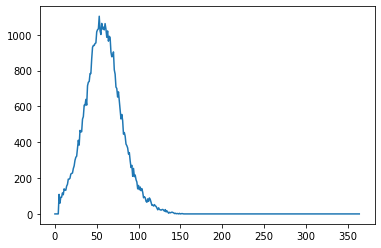

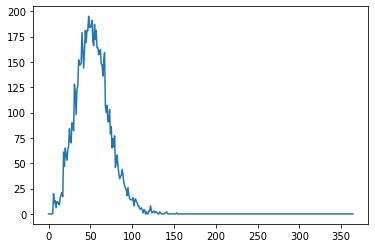

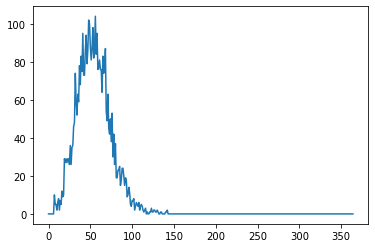

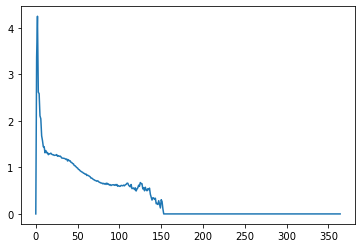

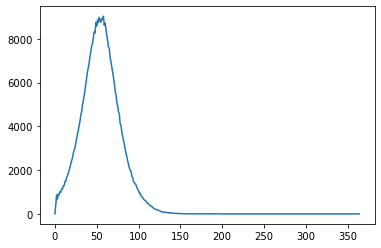

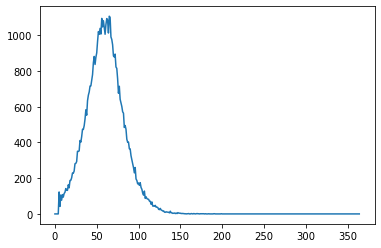

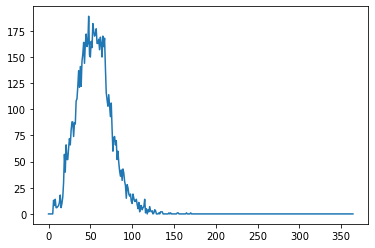

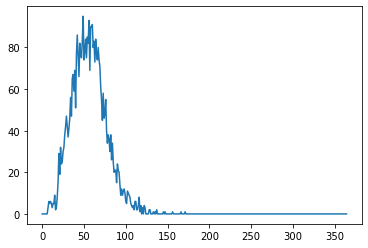

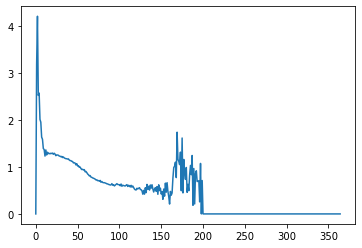

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
from statistics import mean,variance
'''
Qu'est ce qu'on a comme résultats pour le moment :
- Les listes
- Taux de mortalité des gens contaminé
- Taux de mortalité par tranche d'age des gens contaminé

On peut donc envisager beaucoup d'autres résultats.


'''
resReplication1 = []
resReplication2 = []
resReplication3 = []
resReplication4 = []
resReplication5 = []
resReplication6 = []
resReplication7 = []
resReplication8 = []
resReplication9 = []
resReplication10 = []

for replication in range(0,10):
    
    listNumIteration = []
    listNbNouvCas = []
    listNbPersonneHosp = []
    listNbPersonneRea = []
    listNbNouvHosp = []
    listNbNouvRea = []
    listNbNouvMort = []
    nbCasCovidConnuTotal = 0
    listAgeMort = []
    listAgeNouvCasSymptomatique = []
    listReffectif = []

    f = open("log"+str(replication)+".txt", "r")
    fileLines = f.readlines()
    i = 0
    for line in fileLines:
        if("CompteurRand:" in line):
            listSplit = line.split(":")
            nbRandomGenere = (int(listSplit[1]))
        elif("##" not in line):
            if(i == 0):
                listNumIteration.append(int(line))
                i = i + 1
            elif(i==1):
                listNbNouvCas.append(int(line))
                i = i + 1
            elif(i==2):
                listNbPersonneHosp.append(int(line))
                i = i + 1
            elif(i==3):
                listNbPersonneRea.append(int(line))
                i = i + 1
            elif(i==4):
                listNbNouvHosp.append(int(line))
                i = i + 1
            elif(i==5):
                listNbNouvRea.append(int(line))
                i = i + 1
            elif(i==6):
                listNbNouvMort.append(int(line))
                i = i + 1
            elif(i==7):
                nbCasCovidConnuTotal = (int(line))
                i = i + 1
            elif(i==8):
                listReffectif.append(float(line))
                i = i + 1
            elif("AgeC:" in line):
                listSplit = line.split(":")
                listAgeNouvCasSymptomatique.append(int(listSplit[1]))
            elif("AgeD:" in line):
                listSplit = line.split(":")
                listAgeMort.append(int(listSplit[1]))
        
        else:
            i = 0

    f.close()
    """
    f = open("compteur"+str(replication)+".txt", "r")
    nbRandomGenere = f.readline();
    f.close()
    """
    
    
    
    
    plt.figure(replication*5)
    print("Courbe des nouveaux cas sur la réplication num : " +str(replication))
    plt.plot(listNumIteration, listNbNouvCas)  # Matplotlib plot.
    plt.savefig("nouvCasParisFullNoVaccin0.1_replication"+str(replication)+".png")
    
    plt.figure(replication*5+1)
    print("Courbe des nouvelles hospitalisation sur la réplication num : " +str(replication))
    plt.plot(listNumIteration, listNbNouvHosp)
    plt.savefig("nouvHospParisFullNoVaccin0.1_replication"+str(replication)+".png")
    
    plt.figure(replication*5+2)
    print("Courbe des nouvelles réanimation sur la réplication num : " +str(replication))
    plt.plot(listNumIteration, listNbNouvRea)
    plt.savefig("nouvReaParisFullNoVaccin0.1_replication"+str(replication)+".png")
    
    plt.figure(replication*5+3)
    print("Courbe des nouveaux morts sur la réplication num : " +str(replication))
    plt.plot(listNumIteration, listNbNouvMort)
    plt.savefig("nouvMortParisFullNoVaccin0.1_replication"+str(replication)+".png")
    
    print("Courbe de Reffectif sur la réplication num : " +str(replication))
    plt.figure(replication*5+4)
    plt.plot(listNumIteration, listReffectif)
    plt.savefig("ReffectifParisFullNoVaccin0.1_replication"+str(replication)+".png")

    nbMortTotal = sum(listNbNouvMort)
    tauxDeMortCasConnu = (nbMortTotal / nbCasCovidConnuTotal) * 100

    print("Le taux de mort de cas connu est de : " + str(tauxDeMortCasConnu) + "%")

    ## IL ME FAUT L'AGE DES GENS CONTAMINE AUSSI ... 


    nbAge0 = 0
    nbAge1 = 0
    nbAge2 = 0
    nbAge3 = 0
    nbAge4 = 0
    nbAge5 = 0
    nbAge6 = 0
    nbAge7 = 0

    for i in listAgeNouvCasSymptomatique:
        if i == 0:
            nbAge0 = nbAge0 + 1
        elif i == 1:
            nbAge1 = nbAge1 + 1
        elif i == 2:
            nbAge2 = nbAge2 + 1
        elif i == 3:
            nbAge3 = nbAge3 + 1
        elif i == 4:
            nbAge4 = nbAge4 + 1
        elif i == 5:
            nbAge5 = nbAge5 + 1
        elif i == 6:
            nbAge6 = nbAge6 + 1
        elif i == 7:
            nbAge7 = nbAge7 + 1


    nbAgeMort0 = 0
    nbAgeMort1 = 0
    nbAgeMort2 = 0
    nbAgeMort3 = 0
    nbAgeMort4 = 0
    nbAgeMort5 = 0
    nbAgeMort6 = 0
    nbAgeMort7 = 0

    for i in listAgeMort:
        if i == 0:
            nbAgeMort0 = nbAgeMort0 + 1
        elif i == 1:
            nbAgeMort1 = nbAgeMort1 + 1
        elif i == 2:
            nbAgeMort2 = nbAgeMort2 + 1
        elif i == 3:
            nbAgeMort3 = nbAgeMort3 + 1
        elif i == 4:
            nbAgeMort4 = nbAgeMort4 + 1
        elif i == 5:
            nbAgeMort5 = nbAgeMort5 + 1
        elif i == 6:
            nbAgeMort6 = nbAgeMort6 + 1
        elif i == 7:
            nbAgeMort7 = nbAgeMort7 + 1


    print("Le taux de mortalité pour les 0 - 15 ans est de : " + str( (nbAgeMort0/nbAge0) * 100) + "%") 
    print("Le taux de mortalité pour les 15 - 25 ans est de : " + str( (nbAgeMort1/nbAge1) * 100) + "%") 
    print("Le taux de mortalité pour les 25 - 35 ans est de : " + str( (nbAgeMort2/nbAge2) * 100) + "%") 
    print("Le taux de mortalité pour les 35 - 45 ans est de : " + str( (nbAgeMort3/nbAge3) * 100) + "%") 
    print("Le taux de mortalité pour les 45 - 55 ans est de : " + str( (nbAgeMort4/nbAge4) * 100) + "%") 
    print("Le taux de mortalité pour les 55 - 65 ans est de : " + str( (nbAgeMort5/nbAge5) * 100) + "%") 
    print("Le taux de mortalité pour les 65 - 75 ans est de : " + str( (nbAgeMort6/nbAge6) * 100) + "%") 
    print("Le taux de mortalité pour les 75 + ans est de : " + str( (nbAgeMort7/nbAge7) * 100) + "%")
    
    print("############\n################")
    print(" replication = " + str(replication))
    if(replication == 0):
        resReplication1.append(listNumIteration)
        resReplication1.append(listNbNouvCas)
        resReplication1.append(listNbPersonneHosp)
        resReplication1.append(listNbPersonneRea)
        resReplication1.append(listNbNouvHosp)
        resReplication1.append(listNbNouvMort)
        resReplication1.append(listReffectif)
        resReplication1.append(nbCasCovidConnuTotal)
        resReplication1.append(tauxDeMortCasConnu)
        resReplication1.append((nbAgeMort0/nbAge0) * 100)
        resReplication1.append((nbAgeMort1/nbAge1) * 100)
        resReplication1.append((nbAgeMort2/nbAge2) * 100)
        resReplication1.append((nbAgeMort3/nbAge3) * 100)
        resReplication1.append((nbAgeMort4/nbAge4) * 100)
        resReplication1.append((nbAgeMort5/nbAge5) * 100)
        resReplication1.append((nbAgeMort6/nbAge6) * 100)
        resReplication1.append((nbAgeMort7/nbAge7) * 100)
        resReplication1.append(int(nbRandomGenere))
        
    elif(replication == 1):
        resReplication2.append(listNumIteration)
        resReplication2.append(listNbNouvCas)
        resReplication2.append(listNbPersonneHosp)
        resReplication2.append(listNbPersonneRea)
        resReplication2.append(listNbNouvHosp)
        resReplication2.append(listNbNouvMort)
        resReplication2.append(listReffectif)
        resReplication2.append(nbCasCovidConnuTotal)
        resReplication2.append(tauxDeMortCasConnu)
        resReplication2.append((nbAgeMort0/nbAge0) * 100)
        resReplication2.append((nbAgeMort1/nbAge1) * 100)
        resReplication2.append((nbAgeMort2/nbAge2) * 100)
        resReplication2.append((nbAgeMort3/nbAge3) * 100)
        resReplication2.append((nbAgeMort4/nbAge4) * 100)
        resReplication2.append((nbAgeMort5/nbAge5) * 100)
        resReplication2.append((nbAgeMort6/nbAge6) * 100)
        resReplication2.append((nbAgeMort7/nbAge7) * 100)
        resReplication2.append(int(nbRandomGenere))
        
    elif(replication == 2):
        resReplication3.append(listNumIteration)
        resReplication3.append(listNbNouvCas)
        resReplication3.append(listNbPersonneHosp)
        resReplication3.append(listNbPersonneRea)
        resReplication3.append(listNbNouvHosp)
        resReplication3.append(listNbNouvMort)
        resReplication3.append(listReffectif)
        resReplication3.append(nbCasCovidConnuTotal)
        resReplication3.append(tauxDeMortCasConnu)
        resReplication3.append((nbAgeMort0/nbAge0) * 100)
        resReplication3.append((nbAgeMort1/nbAge1) * 100)
        resReplication3.append((nbAgeMort2/nbAge2) * 100)
        resReplication3.append((nbAgeMort3/nbAge3) * 100)
        resReplication3.append((nbAgeMort4/nbAge4) * 100)
        resReplication3.append((nbAgeMort5/nbAge5) * 100)
        resReplication3.append((nbAgeMort6/nbAge6) * 100)
        resReplication3.append((nbAgeMort7/nbAge7) * 100)
        resReplication3.append(int(nbRandomGenere))
        
    elif(replication == 3):
        resReplication4.append(listNumIteration)
        resReplication4.append(listNbNouvCas)
        resReplication4.append(listNbPersonneHosp)
        resReplication4.append(listNbPersonneRea)
        resReplication4.append(listNbNouvHosp)
        resReplication4.append(listNbNouvMort)
        resReplication4.append(listReffectif)
        resReplication4.append(nbCasCovidConnuTotal)
        resReplication4.append(tauxDeMortCasConnu)
        resReplication4.append((nbAgeMort0/nbAge0) * 100)
        resReplication4.append((nbAgeMort1/nbAge1) * 100)
        resReplication4.append((nbAgeMort2/nbAge2) * 100)
        resReplication4.append((nbAgeMort3/nbAge3) * 100)
        resReplication4.append((nbAgeMort4/nbAge4) * 100)
        resReplication4.append((nbAgeMort5/nbAge5) * 100)
        resReplication4.append((nbAgeMort6/nbAge6) * 100)
        resReplication4.append((nbAgeMort7/nbAge7) * 100)
        resReplication4.append(int(nbRandomGenere))
        
    elif(replication == 4):
        resReplication5.append(listNumIteration)
        resReplication5.append(listNbNouvCas)
        resReplication5.append(listNbPersonneHosp)
        resReplication5.append(listNbPersonneRea)
        resReplication5.append(listNbNouvHosp)
        resReplication5.append(listNbNouvMort)
        resReplication5.append(listReffectif)
        resReplication5.append(nbCasCovidConnuTotal)
        resReplication5.append(tauxDeMortCasConnu)
        resReplication5.append((nbAgeMort0/nbAge0) * 100)
        resReplication5.append((nbAgeMort1/nbAge1) * 100)
        resReplication5.append((nbAgeMort2/nbAge2) * 100)
        resReplication5.append((nbAgeMort3/nbAge3) * 100)
        resReplication5.append((nbAgeMort4/nbAge4) * 100)
        resReplication5.append((nbAgeMort5/nbAge5) * 100)
        resReplication5.append((nbAgeMort6/nbAge6) * 100)
        resReplication5.append((nbAgeMort7/nbAge7) * 100)
        resReplication5.append(int(nbRandomGenere))
    
    elif(replication == 5):
        resReplication6.append(listNumIteration)
        resReplication6.append(listNbNouvCas)
        resReplication6.append(listNbPersonneHosp)
        resReplication6.append(listNbPersonneRea)
        resReplication6.append(listNbNouvHosp)
        resReplication6.append(listNbNouvMort)
        resReplication6.append(listReffectif)
        resReplication6.append(nbCasCovidConnuTotal)
        resReplication6.append(tauxDeMortCasConnu)
        resReplication6.append((nbAgeMort0/nbAge0) * 100)
        resReplication6.append((nbAgeMort1/nbAge1) * 100)
        resReplication6.append((nbAgeMort2/nbAge2) * 100)
        resReplication6.append((nbAgeMort3/nbAge3) * 100)
        resReplication6.append((nbAgeMort4/nbAge4) * 100)
        resReplication6.append((nbAgeMort5/nbAge5) * 100)
        resReplication6.append((nbAgeMort6/nbAge6) * 100)
        resReplication6.append((nbAgeMort7/nbAge7) * 100)
        resReplication6.append(int(nbRandomGenere))
    
    elif(replication == 6):
        resReplication7.append(listNumIteration)
        resReplication7.append(listNbNouvCas)
        resReplication7.append(listNbPersonneHosp)
        resReplication7.append(listNbPersonneRea)
        resReplication7.append(listNbNouvHosp)
        resReplication7.append(listNbNouvMort)
        resReplication7.append(listReffectif)
        resReplication7.append(nbCasCovidConnuTotal)
        resReplication7.append(tauxDeMortCasConnu)
        resReplication7.append((nbAgeMort0/nbAge0) * 100)
        resReplication7.append((nbAgeMort1/nbAge1) * 100)
        resReplication7.append((nbAgeMort2/nbAge2) * 100)
        resReplication7.append((nbAgeMort3/nbAge3) * 100)
        resReplication7.append((nbAgeMort4/nbAge4) * 100)
        resReplication7.append((nbAgeMort5/nbAge5) * 100)
        resReplication7.append((nbAgeMort6/nbAge6) * 100)
        resReplication7.append((nbAgeMort7/nbAge7) * 100)
        resReplication7.append(int(nbRandomGenere))

    elif(replication == 7):
        resReplication8.append(listNumIteration)
        resReplication8.append(listNbNouvCas)
        resReplication8.append(listNbPersonneHosp)
        resReplication8.append(listNbPersonneRea)
        resReplication8.append(listNbNouvHosp)
        resReplication8.append(listNbNouvMort)
        resReplication8.append(listReffectif)
        resReplication8.append(nbCasCovidConnuTotal)
        resReplication8.append(tauxDeMortCasConnu)
        resReplication8.append((nbAgeMort0/nbAge0) * 100)
        resReplication8.append((nbAgeMort1/nbAge1) * 100)
        resReplication8.append((nbAgeMort2/nbAge2) * 100)
        resReplication8.append((nbAgeMort3/nbAge3) * 100)
        resReplication8.append((nbAgeMort4/nbAge4) * 100)
        resReplication8.append((nbAgeMort5/nbAge5) * 100)
        resReplication8.append((nbAgeMort6/nbAge6) * 100)
        resReplication8.append((nbAgeMort7/nbAge7) * 100)
        resReplication8.append(int(nbRandomGenere))
    
    elif(replication == 8):
        resReplication9.append(listNumIteration)
        resReplication9.append(listNbNouvCas)
        resReplication9.append(listNbPersonneHosp)
        resReplication9.append(listNbPersonneRea)
        resReplication9.append(listNbNouvHosp)
        resReplication9.append(listNbNouvMort)
        resReplication9.append(listReffectif)
        resReplication9.append(nbCasCovidConnuTotal)
        resReplication9.append(tauxDeMortCasConnu)
        resReplication9.append((nbAgeMort0/nbAge0) * 100)
        resReplication9.append((nbAgeMort1/nbAge1) * 100)
        resReplication9.append((nbAgeMort2/nbAge2) * 100)
        resReplication9.append((nbAgeMort3/nbAge3) * 100)
        resReplication9.append((nbAgeMort4/nbAge4) * 100)
        resReplication9.append((nbAgeMort5/nbAge5) * 100)
        resReplication9.append((nbAgeMort6/nbAge6) * 100)
        resReplication9.append((nbAgeMort7/nbAge7) * 100)
        resReplication9.append(int(nbRandomGenere))
        
    elif(replication == 9):
        resReplication10.append(listNumIteration)
        resReplication10.append(listNbNouvCas)
        resReplication10.append(listNbPersonneHosp)
        resReplication10.append(listNbPersonneRea)
        resReplication10.append(listNbNouvHosp)
        resReplication10.append(listNbNouvMort)
        resReplication10.append(listReffectif)
        resReplication10.append(nbCasCovidConnuTotal)
        resReplication10.append(tauxDeMortCasConnu)
        resReplication10.append((nbAgeMort0/nbAge0) * 100)
        resReplication10.append((nbAgeMort1/nbAge1) * 100)
        resReplication10.append((nbAgeMort2/nbAge2) * 100)
        resReplication10.append((nbAgeMort3/nbAge3) * 100)
        resReplication10.append((nbAgeMort4/nbAge4) * 100)
        resReplication10.append((nbAgeMort5/nbAge5) * 100)
        resReplication10.append((nbAgeMort6/nbAge6) * 100)
        resReplication10.append((nbAgeMort7/nbAge7) * 100)
        resReplication10.append(int(nbRandomGenere))
        

dataframeResultats = pd.DataFrame({"Champs":["nbCasCovidConnuTotal","tauxDeMortCasConnu", "tauxDeMort0-15ans", "tauxDeMort15-25ans","tauxDeMort25-35ans","tauxDeMort35-45ans","tauxDeMort45-55ans","tauxDeMort55-65ans","tauxDeMort65-75ans","tauxDeMort75+ans","nbRandomGenere"]})

dataframeResultats["R1"] = resReplication1[-11:]
dataframeResultats["R2"] = resReplication2[-11:]
dataframeResultats["R3"] = resReplication3[-11:]
dataframeResultats["R4"] = resReplication4[-11:]
dataframeResultats["R5"] = resReplication5[-11:]
dataframeResultats["R6"] = resReplication6[-11:]
dataframeResultats["R7"] = resReplication7[-11:]
dataframeResultats["R8"] = resReplication8[-11:]
dataframeResultats["R9"] = resReplication9[-11:]
dataframeResultats["R10"] = resReplication10[-11:]


listMoyenne = [mean([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10]) for r1,r2,r3,r4,r5,r6,r7,r8,r9,r10 in zip(resReplication1[-11:],resReplication2[-11:],resReplication3[-11:],resReplication4[-11:],resReplication5[-11:],resReplication6[-11:],resReplication7[-11:],resReplication8[-11:],resReplication9[-11:],resReplication10[-11:])]

listVariance = [variance([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10]) for r1,r2,r3,r4,r5,r6,r7,r8,r9,r10 in zip(resReplication1[-11:],resReplication2[-11:],resReplication3[-11:],resReplication4[-11:],resReplication5[-11:],resReplication6[-11:],resReplication7[-11:],resReplication8[-11:],resReplication9[-11:],resReplication10[-11:])]

'''
Confidence Intervals Using the t Distribution
If we’re working with a small sample (n <30), we can use the t.interval() function from the scipy.stats library to calculate a confidence interval for a population mean.

The following example shows how to calculate a confidence interval for the true population mean height (in inches) of a certain species of plant, using a sample of 15 plants:



###########
Confidence Intervals Using the Normal Distribution
If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.




'''

listIntervalle95 = [st.t.interval(alpha=0.95, df=len([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10])-1, loc=np.mean([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10]), scale=st.sem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10])) for r1,r2,r3,r4,r5,r6,r7,r8,r9,r10 in zip(resReplication1[-11:],resReplication2[-11:],resReplication3[-11:],resReplication4[-11:],resReplication5[-11:],resReplication6[-11:],resReplication7[-11:],resReplication8[-11:],resReplication9[-11:],resReplication10[-11:])]

dataframeResultats["Moyenne"] = listMoyenne
dataframeResultats["Variance"] = listVariance
dataframeResultats["Intervalle95%"] = listIntervalle95

print(dataframeResultats)

dataframeResultats.to_csv("statsParisFullNoVaccin0.05.csv", sep="|")
dataframeResultats.to_html("statsParisFullNoVaccin0.05.html",float_format='%.3f')